# <center>Machine Learning Project - Ensemble Learning <br>with Scikit-learn and Keras</center>
## <center>Ensemble of Models learning to predict the survival chances of the Passengers onboard the infamous <i>Titanic</i> Vessel</center>
### <center>by Karine Legrand, February 2022</center>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data">Data Acquisition, Wrangling and Preprocessing</a>
<li><a href="#ensembles">Choosing Ensembles Learning Models</a></li>
<li><a href="#results">Comparing the Ensembles' Results</a></li>    
<li><a href="#conclusion">Conclusion and Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

Let's consider the well-known dataset describing characteristics of the Passengers onboard the infamous 'Titanic' Vessel, wich sank on April 14th of 1912, close to the Coast of New Foundland/Canada. The Majority of those passengers (about $60\%$) did not survive the Tragedy.<br><br>We could take different Approaches and for instance, as I did in previous Projects:
- Conduct an Exploratory Data Analysis to get Insights about which factors would affect the chance of survival. We could with this <i>EDA</i>, analyse with statistical methods and visualizations, wether -and under which possible circonstances-, some people were more likely to survive the tragedy than others
- As another Approach we could design a Neural Network working as a 'Classifier' to predict our Outcome ("survived"/"trepassed"). We would therefore, take a set of features in the dataset, that would be used to train the model, which in turn, would be able to predict our dependent variable, i.e  wether a passenger survived or not. As our outcome is a categorical variable with 2 levels ("survived"/"died", or "True/False"), we would implement A Neural Network for "Binary Classification", with the TensorFlow/Keras framework.
<br>

We will yet in this Project, take a third Approach, using Ensemble Learning algorithms. We will build several Ensemble Models grouping "weak" Classification Learners, with different Techniques (Bagging, Boosting, VotingClassifier).
After inspecting the Performance of the Ensembles in comparison to each of the weak Learners alone,  we will finally compare the different Ensemble Learning Models to one another.

<a id='data'></a>
## Data Acquisition, Wrangling and Preprocessing

As in any Data Analysis Approach, the Input Data first need to be aquired, wrangled, cleaned and processed. Only then, can it be used by the Model(s) we choose for making predictions of the dependent variable (here `Survived`), based on our independent variables, (here: `['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']`).<br>
<br> 

Overview of the Columns-meaning:
- "SibSp" stands for "Siblings/Spouse",
- "ParCh" stands for "Parents/Children",
Both variables indicates if a Passenger had Sibling(s)/Partner and Parents/Children on board or none of them and travelling alone,
- "Embarked" is related to the Port on the Route where People embarked, either "S for Southampton", "C for Cherbourg" or "Q for Queenstown" in the Uk and in France,
- "Fare" is the price the person paid for him/herself and their family if any,
- "Cabin" is the Reference number of the reserved cabin if any,
- "Pclass" is the Travel-class of the Passenger (First, Second or Third).
The other columns are self explanatory.

<br><br>I will use the cleaned Data from a previous Project, where the following necessary steps were taken:

- Fixing quality and tidiness issues (always needed)
- Formatting the data for scikit-learn (Machine Learning Models ). For this it means, precisely to "One hot encode" categorical variables.
 
<i>The csv File "titanic_DL_ready.csv", provided with this notebook, must be in the current working directory.</i>

### Importing the 'Data Science Stack' Libraries

In [3]:
# import Data Analysis stack libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# import the Machine Learning needed packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [5]:
import xgboost as xgb 
# Note: XGBoost was installed in our conda environment 
# with "conda install -c conda-forge py-xgboost"

# import the libraries for Neural Network modeling
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential


### Load the csv File with pandas

In [6]:
# first load our Dataset
df_titanic = pd.read_csv("titanic_DL_ready.csv")
print(df_titanic.shape)

(889, 12)


In [7]:
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,1


Note about "One-Hot-Encoding":<br>
The categorical non-ordinal features need to be converted in a binary form, because our model can only work with numerical values. This is the case for `['Sex', 'Cabin', 'Embarked']`.
<i>Note:</i> The feature `Pclass` is categorical and integer-encoded (1 to 3). It is also <i>ordinal</i>. It means that the travelling Class has a rank (1 is the best, 3 is the worst Class). In this case it is important to preserve this valuable information and keep the levels together in one single variable, as the models can interpret this.


### Assign the Features and the Response, split the Data in Training/Test sets

In [8]:
# set the Features
X = df_titanic.drop(columns=['Survived']) # all the columns except the Response

# set the Labels
y = df_titanic['Survived'] # the variable we aim to predict

print(X.shape, type(X))
print(y.shape, type(y))

(889, 11) <class 'pandas.core.frame.DataFrame'>
(889,) <class 'pandas.core.series.Series'>


Next we will split the Data. Note that we need to keep the same proportion of the label values across the randomly splitted data, because these are imbalanced (about 40% of People survived against 60% of People who did not) and will therefore need to <i>stratify</i> the data against our Label values, when splitting them.

In [9]:
# Set the Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4,
                                                   stratify=y)

### Normalizing the Features

Normalizing the Train Data is an important step as it prevents our Classifiers to wrongly interpret some features as being more significant than others.
To illustrate this issue, let's have a deeper look at the values taken by the 'Pclass', 'SibSp', 'Parch' and 'Fare' Features, respectively:

In [10]:
X_train[['Pclass', 'Fare', 'SibSp','Parch']].describe().loc[['mean', 'std', 'min','max']]

,Pclass,Fare,SibSp,Parch
mean,2.298172,33.479769,0.511955,0.382560
std,0.836481,52.870896,1.083583,0.808358
min,1.000000,0.000000,0.000000,0.000000
max,3.000000,512.329200,8.000000,6.000000


If we did not normalize the data, the Models would be biased towards the 'Fare' values and interpret a bigger significance of this Feature for predicting a Label. To prevent this, all Feature values are translated and represented as a normalized value instead.

In [11]:
# Let's Normalize the Data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Use the MinMaxScaler Class
sc = MinMaxScaler(feature_range=(0.01, 0.99))

# fit
sc.fit(X_train)

X_train_sc =sc.transform(X_train)
X_test_sc = sc.transform(X_test)

<i>Note:</i> To normalize the data we use the 'MinMaxScaler' instead of the 'StandardScaler' from sklearn, translating the values between (0, 1) exclusively.
The reason to this is that we will use a Neural Network as one of our "Classifiers", with a "ReLu"(Rectified Linear Unit) activation function. All negative or null Input values would be bypassed in this case, if the Data was normalized with a 'StandardScaler'!

In [13]:
X_train_sc[:1]

array([[0.99      , 0.37232699, 0.01      , 0.01      , 0.02386804,
        0.01      , 0.01      , 0.99      , 0.01      , 0.01      ,
        0.99      ]])

In [14]:
y_train[:1]

364    0
Name: Survived, dtype: int64

In [15]:
X_test_sc[:1]

array([[0.99      , 0.36861005, 0.1325    , 0.17333333, 0.03916266,
        0.01      , 0.01      , 0.99      , 0.99      , 0.01      ,
        0.01      ]])

In [16]:
y_test[:1]

708    1
Name: Survived, dtype: int64

In [17]:
print(type(X_train), type(X_train_sc), type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


<a id="ensembles"></a>
## Choosing Ensemble Learning Models

### 1. Pick the "weak" Learners
In this section we will first pick each of the Classifier Estimators that could be used alone to solve our Classification Problem. We will train each model with the training Data and compute the Accuracy of the Class Predictions on the Train and Test Sets, for each of them. 

#### 1. Decision Tree Classifier

The Decision Tree is a low latency and robust Classifier which still has a major drawback: It is prone to overfit. To prevent this, we set a constraint on the maximal level-depth in the parameter `max_depth` of the constructor, which increases the performance of the model at generalizing.  

##### Instantiate and train the Model:

In [18]:
%%capture exec_time 
%%time
# Decision Tree

dt = DecisionTreeClassifier(random_state=42, max_depth=4) #random_state is used for reproducibility
dt.fit(X_train_sc,y_train)

In [19]:
# the %%capture magic gets the output of the whole cell, so we can save the %%time output
# in a variable 
print(exec_time, vars(exec_time))

CPU times: user 1.98 ms, sys: 1.02 ms, total: 3 ms
Wall time: 4 ms
 {'_stdout': <_io.StringIO object at 0x7fe279638550>, '_stderr': <_io.StringIO object at 0x7fe279638670>, '_outputs': [{'data': {'text/plain': 'DecisionTreeClassifier(max_depth=4, random_state=42)'}, 'metadata': {}}]}


##### Keep the execution time for (creating and) training the model for later comparison:

In [20]:
# with the %%capture cell magic, grab the value printed out as the "Wall time" for re-use!
wall_time = exec_time.stdout.strip().split("\n")[1][11:]
wall_time

'4 ms'

##### Define a list `list_results` and a Utility Function `model_print_score` to print out the Train/Test scores and keep the results:

In [21]:
list_results = list()

In [22]:
# Utility Function to print out the scores of a model
def model_print_score(model=None, list_res=None, wall_time=None, name=None):
    """ This function evaluates the accuracy of the model in respect to the Train and Test
        Data and keeps these values as well as the execution time for training, in a list, 
        for later re-use.
    """
    #print(X_test_sc.shape, y_test.shape) #debug for VotingClassifier with NN
    #print(X_train_sc.shape, y_train.shape)
    
    acc_test  = model.score(X_test_sc,y_test)
    acc_train = model.score(X_train_sc,y_train)
    
    print(f"Accuracy on Train data: {acc_train:.3f} and on Test Data: {acc_test:.3f}")
    if not name:
        list_res.append((model.__class__.__name__, round(acc_train, 3), round(acc_test,3), 
                    wall_time))
    else:
        list_res.append((name, round(acc_train, 3), round(acc_test,3), 
                    wall_time))

##### Get the Train/Test Accuracy of the Model:

In [23]:
model_print_score(dt, list_results, wall_time)

Accuracy on Train data: 0.851 and on Test Data: 0.792


In [24]:
list_results

[('DecisionTreeClassifier', 0.851, 0.792, '4 ms')]

#### 2. Gaussian Naive Bayes Classifier
We will proceed with the same exact steps for all the Models. Here 'Gaussian Naive Bayes':

In [25]:
%%capture exec_time
%%time
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_sc, y_train)

In [26]:
print(exec_time)

CPU times: user 1.15 ms, sys: 688 us, total: 1.83 ms
Wall time: 1.42 ms



In [27]:
# Parse the "Wall time" from the "exec_timeoutput
wall_time = exec_time.stdout.strip().split("\n")[1][11:]
wall_time

'1.42 ms'

##### Get the Train/Test scores from the Model and save the values

In [28]:
model_print_score(gnb, list_results, wall_time)

Accuracy on Train data: 0.799 and on Test Data: 0.742


#### 3. Logistic Regression Classifier
We use the classifier with the default-solver 'lbfgs' which is good for small datasets (given in the constructor for clarity purposes only)

In [29]:
%%capture exec_time
%%time
# Logistic Regression
lg = LogisticRegression(solver='lbfgs', random_state=42)
lg.fit(X_train_sc, y_train)

In [30]:
print(exec_time)

CPU times: user 6.57 ms, sys: 960 us, total: 7.53 ms
Wall time: 8.12 ms



In [31]:
wall_time = exec_time.stdout.strip().split("\n")[1][11:]
wall_time

'8.12 ms'

In [32]:
model_print_score(lg, list_results, wall_time)

Accuracy on Train data: 0.813 and on Test Data: 0.753


In [33]:
list_results

[('DecisionTreeClassifier', 0.851, 0.792, '4 ms'),
 ('GaussianNB', 0.799, 0.742, '1.42 ms'),
 ('LogisticRegression', 0.813, 0.753, '8.12 ms')]

#### 4. Stochastic Gradient Descent Classifier
The 'SGDClassifier' Model, set with a loss function of 'log', can provide better results than the LogisticRegression, depending on the Data. Let's use it and see if it's the case here.


In [34]:
%%capture exec_time
%%time
# SGDClassifier

sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(X_train_sc, y_train)

In [35]:
print(exec_time)

CPU times: user 3.88 ms, sys: 909 us, total: 4.79 ms
Wall time: 4.97 ms



In [36]:
wall_time = exec_time.stdout.strip().split("\n")[1][11:]
wall_time

'4.97 ms'

In [37]:
model_print_score(sgd, list_results, wall_time)

Accuracy on Train data: 0.802 and on Test Data: 0.742


The Logistic Regression Classifier performed better.

#### 5. Support Vector Classifier

In [38]:
%%capture exec_time
%%time
# SVC
svc = SVC()
svc.fit(X_train_sc, y_train)

In [39]:
print(exec_time)

CPU times: user 9.4 ms, sys: 1.15 ms, total: 10.5 ms
Wall time: 10.8 ms



In [40]:
wall_time = exec_time.stdout.strip().split("\n")[1][11:]
wall_time

'10.8 ms'

In [41]:
model_print_score(svc, list_results, wall_time)

Accuracy on Train data: 0.827 and on Test Data: 0.764


### First Comparison between the 'weak' Learners:

We can use the `list_results` variable to compare the Performance of our weak Learners in a Barchart. 

##### Get the list of Results and format them in a 'Pandas Dataframe' which is best to use for plotting with seaborn:

In [42]:
list_results

[('DecisionTreeClassifier', 0.851, 0.792, '4 ms'),
 ('GaussianNB', 0.799, 0.742, '1.42 ms'),
 ('LogisticRegression', 0.813, 0.753, '8.12 ms'),
 ('SGDClassifier', 0.802, 0.742, '4.97 ms'),
 ('SVC', 0.827, 0.764, '10.8 ms')]

In [43]:
# get the List as a Pandas Dataframe:
df_result = pd.DataFrame()

for i, val in enumerate(list_results):
    df_result.loc[i, 'Model'] = val[0]
    df_result.loc[i, 'Train_score'] = val[1]
    df_result.loc[i, 'Test_score'] = val[2]
    df_result.loc[i, 'Training_time'] = val[3]
df_result.head()

,Model,Train_score,Test_score,Training_time
0,DecisionTreeClassifier,0.851,0.792,4 ms
1,GaussianNB,0.799,0.742,1.42 ms
2,LogisticRegression,0.813,0.753,8.12 ms
3,SGDClassifier,0.802,0.742,4.97 ms
4,SVC,0.827,0.764,10.8 ms


##### Plot the Results for the Train and Test Accuracy Scores in a Clustered Barchart:

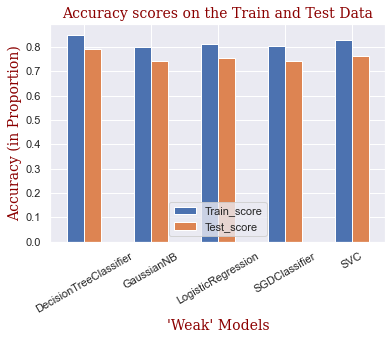

In [44]:
sns.set_theme(style='darkgrid');

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

df_result.plot(kind='bar', x='Model', y=['Train_score', 'Test_score']);
plt.xticks(rotation=30);
plt.xlabel("'Weak' Models",fontdict=font);
plt.ylabel("Accuracy (in Proportion)", fontdict=font);
plt.title("Accuracy scores on the Train and Test Data", fontdict=font);

We can see that the single Classifiers perform equivalently good, both on Test and Training Data (The Prediction Accuracy on the Test Data being the metric that really matters, as we are only interested to know, how good a model is at predicting data it has never seen before).<br>
The <b>Decision Tree Classifier</b> outperforms slightly all other Models. The Accuray reached  on the Training Set is more than $85\%$ and the Accuracy of the Predictions on the Test Set is almost $80\%$ 

Let's now build some Ensemble Learners and see if we can improve the performance of the single Learners!

### 2. Ensemble Learners

#### I/ Random Forest Classifier
Random Forest takes 100 Decision Trees estimators by default and feeds them with a randomised subset of the Features. We set a `max_depth`of 8, to avoid overfitting of the underlying Decision Trees.

In [45]:
%%capture exec_time
%%time
#Random Forest - Ensemble of Descision Trees

rf = RandomForestClassifier(max_depth=8, random_state=42, criterion='entropy')
rf.fit(X_train_sc,y_train)

In [46]:
print(exec_time)

CPU times: user 241 ms, sys: 19.8 ms, total: 261 ms
Wall time: 93.2 ms



In [47]:
wall_time = exec_time.stdout.strip().split("\n")[1][11:]
wall_time

'93.2 ms'

In [48]:
model_print_score(rf, list_results, wall_time)

Accuracy on Train data: 0.923 and on Test Data: 0.798


Notes about the results: 
- We slightly could improve the Accuracy on the Test Data by choosing the `'entropy'` criterion over `'gini'`
- We only got a slight improvement on the accuracy on the Test Data ($79.8\%$), in comparison with a single Decision Tree ($79.2\%$)

#### II/ Bagging Classifier
The Bootstrap aggregating Classifier, randomly takes subsets of the training data, with replacement (i.e 'bootstrap') and feeds them to its Classifiers (all of the same type), which we set as 'Decision Trees' to make a direct comparison with our last Random Forest Ensemble.
We also set the number of estimators to 100 for the same reason.

In [49]:
%%capture exec_time
%%time
#Bagging 

bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, 
                       n_estimators = 100)
bg.fit(X_train_sc, y_train)

In [50]:
print(exec_time)

CPU times: user 112 ms, sys: 1.78 ms, total: 113 ms
Wall time: 113 ms



In [51]:
wall_time = exec_time.stdout.strip().split("\n")[1][11:]
wall_time

'113 ms'

In [52]:
model_print_score(bg, list_results, wall_time)

Accuracy on Train data: 0.940 and on Test Data: 0.781


In [53]:
list_results

[('DecisionTreeClassifier', 0.851, 0.792, '4 ms'),
 ('GaussianNB', 0.799, 0.742, '1.42 ms'),
 ('LogisticRegression', 0.813, 0.753, '8.12 ms'),
 ('SGDClassifier', 0.802, 0.742, '4.97 ms'),
 ('SVC', 0.827, 0.764, '10.8 ms'),
 ('RandomForestClassifier', 0.923, 0.798, '93.2 ms'),
 ('BaggingClassifier', 0.94, 0.781, '113 ms')]

#### III/ Boosting Ensemble - Ada Boost
The Boosting technique strategy is to use a Class of single Learners sequentially, all feeded with a random subset of the Training Data, but where misclassified Samples will be re-used by the next Model, in the "hope" to correct the error. We will train several Boosting Models, beginning with 'Ada Boost'.

In [54]:
%%capture exec_time
%%time
#Boosting - Ada Boost

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 100, learning_rate = 1)
adb.fit(X_train_sc,y_train)

In [55]:
print(exec_time)

CPU times: user 142 ms, sys: 1.26 ms, total: 143 ms
Wall time: 142 ms



In [56]:
wall_time = exec_time.stdout.strip().split("\n")[1][11:]
wall_time

'142 ms'

In [57]:
model_print_score(adb, list_results, wall_time)

Accuracy on Train data: 0.986 and on Test Data: 0.775


#### IV/ Boosting Ensemble - Gradient Boosting

In [58]:
%%capture exec_time
%%time
#Gradient Boosting

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1)
gbc.fit(X_train_sc, y_train)

In [59]:
print(exec_time)

CPU times: user 59.1 ms, sys: 1.25 ms, total: 60.3 ms
Wall time: 60.2 ms



In [60]:
wall_time = exec_time.stdout.strip().split("\n")[1][11:]
wall_time

'60.2 ms'

In [61]:
model_print_score(gbc, list_results, wall_time)

Accuracy on Train data: 0.986 and on Test Data: 0.781


#### V/ Boosting Ensemble - Extreme Gradient Boosting (XGBoost)
XGBoost is an improvement of the Gradient Boosting Model and counts today as 'state-of-the-art' for solving complex Machine Learning Problems, together with Neural Network Models.

In [62]:
%%capture exec_time
%%time
#XGBoost

xgb_cl = xgb.XGBClassifier(n_estimators= 100, learning_rate=1, use_label_encoder=False, 
                           random_state=42)
xgb_cl.fit(X_train_sc, y_train)

In [63]:
print(exec_time)

[01:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955448402/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 568 ms, sys: 118 ms, total: 686 ms
Wall time: 105 ms



In [64]:
wall_time = exec_time.stdout.strip().rsplit("\n")[2][11:]
wall_time

'105 ms'

In [65]:
model_print_score(xgb_cl, list_results, wall_time)

Accuracy on Train data: 0.985 and on Test Data: 0.798


#### VI/ Voting Classifier Ensemble with LogisticRegression, RandomForest and SupportVectorClassifier
Voting Classifiers are Ensembles of different types of Single Learners and also Random Forest Ensembles.
Let's use them with some of our instances:

In [66]:
%%capture exec_time
%%time

#sgd = SGDClassifier(loss='log')
#rnd_clf = RandomForestClassifier()
#svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr', lg), ('rf', rf), ('svc', svc)], 
                              voting='hard')
voting_clf.fit(X_train_sc, y_train)

In [67]:
print(exec_time)

CPU times: user 511 ms, sys: 182 ms, total: 694 ms
Wall time: 111 ms



In [68]:
wall_time = exec_time.stdout.strip().split("\n")[1][11:]
wall_time

'111 ms'

In [69]:
model_print_score(voting_clf, list_results, wall_time, 'Voting(LG, RF, SVC)')

Accuracy on Train data: 0.861 and on Test Data: 0.781


In [70]:
list_results

[('DecisionTreeClassifier', 0.851, 0.792, '4 ms'),
 ('GaussianNB', 0.799, 0.742, '1.42 ms'),
 ('LogisticRegression', 0.813, 0.753, '8.12 ms'),
 ('SGDClassifier', 0.802, 0.742, '4.97 ms'),
 ('SVC', 0.827, 0.764, '10.8 ms'),
 ('RandomForestClassifier', 0.923, 0.798, '93.2 ms'),
 ('BaggingClassifier', 0.94, 0.781, '113 ms'),
 ('AdaBoostClassifier', 0.986, 0.775, '142 ms'),
 ('GradientBoostingClassifier', 0.986, 0.781, '60.2 ms'),
 ('XGBClassifier', 0.985, 0.798, '105 ms'),
 ('Voting(LG, RF, SVC)', 0.861, 0.781, '111 ms')]

#### VII/ Voting Classifier with GaussianNB, DecisionTree and SGDClassifier

In [71]:
%%capture exec_time
%%time
# Second Voting Classifier

evc = VotingClassifier( estimators= [('gnb',gnb),('dt',dt),('sgd',sgd)], voting = 'hard')
evc.fit(X_train_sc,y_train)

In [72]:
print(exec_time)

CPU times: user 24.7 ms, sys: 13.6 ms, total: 38.4 ms
Wall time: 6.82 ms



In [73]:
wall_time = exec_time.stdout.strip().split("\n")[1][11:]
wall_time

'6.82 ms'

In [74]:
model_print_score(evc, list_results, wall_time, 'Voting(GNB, DT, SGD)')

Accuracy on Train data: 0.813 and on Test Data: 0.753


<a id='results'></a>
       
### Comparing the Ensembles' Results:

##### Plot the Results for the Train and Test Accuracy Scores of all Learners and Ensembles in a Clustered Barchart:

In [75]:
list_results

[('DecisionTreeClassifier', 0.851, 0.792, '4 ms'),
 ('GaussianNB', 0.799, 0.742, '1.42 ms'),
 ('LogisticRegression', 0.813, 0.753, '8.12 ms'),
 ('SGDClassifier', 0.802, 0.742, '4.97 ms'),
 ('SVC', 0.827, 0.764, '10.8 ms'),
 ('RandomForestClassifier', 0.923, 0.798, '93.2 ms'),
 ('BaggingClassifier', 0.94, 0.781, '113 ms'),
 ('AdaBoostClassifier', 0.986, 0.775, '142 ms'),
 ('GradientBoostingClassifier', 0.986, 0.781, '60.2 ms'),
 ('XGBClassifier', 0.985, 0.798, '105 ms'),
 ('Voting(LG, RF, SVC)', 0.861, 0.781, '111 ms'),
 ('Voting(GNB, DT, SGD)', 0.813, 0.753, '6.82 ms')]

In [76]:
print(df_result)
print()
print(df_result.describe().loc[['mean', 'max']])

                    Model  Train_score  Test_score Training_time
0  DecisionTreeClassifier        0.851       0.792          4 ms
1              GaussianNB        0.799       0.742       1.42 ms
2      LogisticRegression        0.813       0.753       8.12 ms
3           SGDClassifier        0.802       0.742       4.97 ms
4                     SVC        0.827       0.764       10.8 ms

      Train_score  Test_score
mean       0.8184      0.7586
max        0.8510      0.7920


##### Transform our list in a dataframe as we did before:

In [77]:
df_res_all = pd.DataFrame()

for i, val in enumerate(list_results):
    df_res_all.loc[i, 'Model'] = val[0]
    df_res_all.loc[i, 'Train_score'] = val[1]
    df_res_all.loc[i, 'Test_score'] = val[2]
    df_res_all.loc[i, 'Training_time'] = val[3]

print(df_res_all)

                         Model  Train_score  Test_score Training_time
0       DecisionTreeClassifier        0.851       0.792          4 ms
1                   GaussianNB        0.799       0.742       1.42 ms
2           LogisticRegression        0.813       0.753       8.12 ms
3                SGDClassifier        0.802       0.742       4.97 ms
4                          SVC        0.827       0.764       10.8 ms
5       RandomForestClassifier        0.923       0.798       93.2 ms
6            BaggingClassifier        0.940       0.781        113 ms
7           AdaBoostClassifier        0.986       0.775        142 ms
8   GradientBoostingClassifier        0.986       0.781       60.2 ms
9                XGBClassifier        0.985       0.798        105 ms
10         Voting(LG, RF, SVC)        0.861       0.781        111 ms
11        Voting(GNB, DT, SGD)        0.813       0.753       6.82 ms


##### We will extract the results of the Ensemble Models:

In [78]:
df_ensembles = df_res_all.loc[5:,:]
print(df_ensembles)
print()
print(df_ensembles.describe().loc[['mean', 'max']])

                         Model  Train_score  Test_score Training_time
5       RandomForestClassifier        0.923       0.798       93.2 ms
6            BaggingClassifier        0.940       0.781        113 ms
7           AdaBoostClassifier        0.986       0.775        142 ms
8   GradientBoostingClassifier        0.986       0.781       60.2 ms
9                XGBClassifier        0.985       0.798        105 ms
10         Voting(LG, RF, SVC)        0.861       0.781        111 ms
11        Voting(GNB, DT, SGD)        0.813       0.753       6.82 ms

      Train_score  Test_score
mean     0.927714       0.781
max      0.986000       0.798


##### Plot the results for Ensembles and single Learners

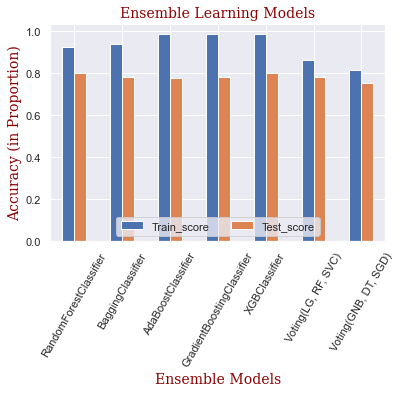

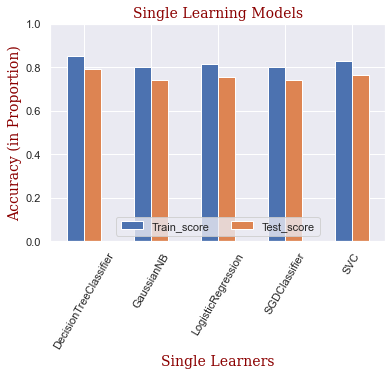

In [79]:
sns.set_theme(style='darkgrid');

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }
#plt.subplot(1, 2, 1)
df_ensembles.plot(kind='bar', x='Model', y=['Train_score', 'Test_score']);
plt.xticks(rotation=60);
plt.xlabel("Ensemble Models",fontdict=font);
plt.ylabel("Accuracy (in Proportion)", fontdict=font);
plt.title("Ensemble Learning Models", fontdict=font);
plt.legend(loc='lower center', ncol = 2);

#plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)

#plt.subplot(1, 2, 2)
df_result.plot(kind='bar', x='Model', y=['Train_score', 'Test_score']);
plt.xticks(rotation=60);
plt.xlabel("Single Learners",fontdict=font);
plt.ylabel("Accuracy (in Proportion)", fontdict=font);
plt.ylim(0, 1.0)
plt.title("Single Learning Models", fontdict=font);
plt.legend(loc='lower center', ncol = 2);


In [80]:
print("Ensembles")
print(df_ensembles.describe().loc[['mean', 'max']])
print()
print("Single Learners")
print(df_result.describe().loc[['mean', 'max']])

Ensembles
      Train_score  Test_score
mean     0.927714       0.781
max      0.986000       0.798

Single Learners
      Train_score  Test_score
mean       0.8184      0.7586
max        0.8510      0.7920


#### Comparison and Analyse of the Results:

The Ensemble Learning Models seem to perfom better, at first Glance. The average Accuracy on the Train Data is $92.8\%$ versus $81.8\%$ for the single models.<br>
Yet the more meaningful accuracy of the Predictions $77.8\%$ in average, is just slightly better than for the single Learners with an average accuracy of $75.9\%$.<br>
<br>
The "Winners" are 'RandomForest' and 'XGBoost' Ensembles with the same best Accuracy score on Test Data $79.8\%$.<br>
The Decision Tree is the "Winner" among the Single Learners and comes very close to the best Ensembles with an Accuracy score of $79.2\%$ on Test Data. It is worth noting that, if it is less performant by $0.6\%$, it is also much faster than Random Forest and XGBoost (1.64ms, 94.1ms, 94.4ms respectively)

#### Appendix: Using a Neural Network with a Voting Classifier

Last but not least we will now try to add a Neural Network as an additional Classifier to our last Voting Classifier Ensemble. We will therefore, use a Neural Network built in a previous Project on the same Dataset:

We have 11 Input units (one for each feature), 2 hidden layers, each with 32 neurons and a 'ReLu' activation function,
1 output layer with a single unit, since we predict two levels of a binary class (Survived:1 or zero), and a sigmoid activation function, which outputs a number between 0 and 1.

We use the standard 'Sequential' keras Model , which is a simple stack of 'Dense' (hence fully-connected)layers.

##### Instantiate the Model with its Hyperparameters:

In [81]:
neural_network = Sequential([
                 layers.Dense(units=32, input_dim=len(X_train.columns), activation='relu'),
                 layers.Dense(units=32, activation='relu'),
                 layers.Dense(units=1, activation='sigmoid')
                 ])


2022-03-30 01:15:45.766915: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [82]:
neural_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


<i>Note:</i> The numbers of parameters in each layer is equal to the number of weights connected to it, plus the number of biases (one pro unit):<br><br>
<center>$NumberParams_k = NumberUnits_{k-1} * NumberUnits_{k} + NumberUnits_{k}$</center>

##### Compile the Model with further Hyperparameters:

- We use the 'Binary Cross Entropy' as the Loss function wich our Network aims to minimize. This function measures the difference of the computed predicted Label from the true Label, kept in our Test Chunk.
- The 'Adaptive Moment Optimizer' (short 'adam') is the algorithm that minimizes the Loss function, by computing its gradient and updates the weights in all layers, by back propagation, at each update step (here after each batch is processed)
- The 'Accuracy' tells us how good the Model performs at minimizing the Loss during the training, by calculating the proportion of correct predicted Labels (on the Train Chunk), we will not extract a validation set out of the trainig data with this network, to use exactly the same Data as the other models.

In [83]:
neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics= 'accuracy')

##### Train the Neural Network:

In [ ]:
%%time

neural_network.fit(X_train_sc, y_train, epochs=100, verbose=0, batch_size=8)

2022-03-30 01:15:45.859525: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


##### Evaluate the Neural Network:

In [ ]:
_, acc_test  = neural_network.evaluate(X_test_sc, y_test)

In [ ]:
neural_network.predict(X_test_sc).shape

In [ ]:
_, acc_train = neural_network.evaluate(X_train_sc, y_train)

The Accuracy on the Train Set is about $86.6\%$ and almost $80\%$ on the Test set.


##### Build a scikit-learn Model from our Keras Neural Network with `KerasClassifier`:

In [ ]:
def build_neural_network():
    model = Sequential([
                 layers.Dense(units=32, input_dim=len(X_train.columns), activation='relu'),
                 layers.Dense(units=32, activation='relu'),
#                 layers.Dropout(rate=0.2, seed=42),
                 layers.Dense(units=1, activation='sigmoid')
            ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
    
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

keras_nn = KerasClassifier(build_fn=build_neural_network)
keras_nn._estimator_type = "classifier"


##### Build a Voting Classifier Ensemble with the Neural Network as an additional Classifier:

In [ ]:
%%capture exec_time
%%time

sgd_clf = SGDClassifier(loss='log')
rnd_clf = RandomForestClassifier()
svm_clf = SVC(gamma="scale", random_state=42,probability=True)

voting_nn = VotingClassifier(estimators=[('sgd', sgd_clf), ('rf', rnd_clf), ('svc', svm_clf), 
                                         ('nn', keras_nn)], voting='soft', 
                                         flatten_transform=True)
voting_nn.fit(X_train_sc, y_train)

In [ ]:
print(exec_time)

In [ ]:
wall_time = exec_time.stdout.strip().split("\n")[2][11:]
wall_time

In [ ]:
model_print_score(voting_nn, list_results, wall_time, 'KerasNNVoting')

##### Results
Against our expectations, we obtained an even worse Performance than with the Single Decision Tree Classifier. It is worth precising that:
- the here designed Neural Network is overfitting as could be seen in a previous Project (the accuracy on Validation Data was very low)
- we had unsolved runtime errors while attempting to make predictions with the Voting Classifier with a `voting = 'hard'`parameter

<a id='conclusion'></a>
### Conclusion and Limitations

The Ensemble Learning Approach enabled us to build different Models that performed quite good at predicting wether a Passenger did survive the 'Titanic' Tragedy based on its Characteristics. We first built different typical Machine Learning Single Classifiers and moved on to implement different Ensemble Learning Techniques using these single Classifiers. We could even build a <b>Voting Classifier</b> Ensemble, containting a Keras Neural Network Model.<br>
The best Performance obtained in terms of Accuracy of Prediction on Test Data were obtained by the:
- <b>Decision Tree</b> Classifier with $85.1\%$ accuracy on Train data, $79.2\%$ on Test data and $2.13ms$ training time
- <b>Random Forest</b> Classifier with $92.3\%$ accuracy on Train data, $79.8\%$ on Test data and $93.9ms$ training time
- <b>XGBoost</b> Classifier with $98.5\%$ Accuracy on Train data, $79.8\%$ on Test data and $104ms$ training time
<br>
<br>

Limitation: the performance of our Models depend on the quantity of the data samples available. This Dataset contains less than 1000 samples which is not much to work with. The Results are actually quite satisfying, considering this limitation. The reason is, as we could show with an Exploratory Data Analysis, that the Response is strongly correlated with some features in the Dataset ('Gender' and 'Class of Travelling' for example). The single and Ensembe learning Models make this correlation speak!
